<a href="https://colab.research.google.com/github/mou135/CBTCIP/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##IRIS FLOWER CLASSIFICATION

1.Import necessary Libraries

2.Exploratory Data Analysis

3.Data preprocessing

4.Model Training using SVM

5.Model evaluation and accuracy check

6.Model Testing with new data points

7.Hyperparameter Tuning using GridSearch

8.Model Deployment

In [145]:
 #Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [146]:
# Load the Iris dataset
URL= ("https://docs.google.com/spreadsheets/d/10bOCTxUKVI5WXkp6KuWOgFhMx6U1OiLPPc3d80omrVM/edit?usp=sharing")
PATH= ("/content/drive/MyDrive/Iris Flower.xlsx") +URL.split('/')[-2]



In [147]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Correct file path
PATH = '/content/drive/MyDrive/Iris Flower.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
#Read the CSV file using  the Scikit-learn Iris dataset
from sklearn import datasets
import pandas as pd

# Load Iris dataset from Scikit-learn
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map the integer labels to species names
species_map = {i: name for i, name in enumerate(iris.target_names)}
df['species'] = df['species'].map(species_map)

print(df.head())
print("Target Labels:", df["species"].unique())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Target Labels: ['setosa' 'versicolor' 'virginica']


In [149]:
print(df.tail())  #last 5 rows of dataset

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  


In [150]:
print(df.describe())  #descriptive statistics of this dataset

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [151]:
df.shape #shape of dataset

(150, 5)

In [152]:
df.columns  #identify the columns name

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [153]:
#Checking any null values are present in dataset or not
df.isna(). sum ()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [154]:
df.duplicated(keep="first").sum() #Checking the duplicates

1

In [155]:
df.info() #checking the info regarding non-null values, count, datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#Exploratory Data Analysis

Ploting the histogram for each feature

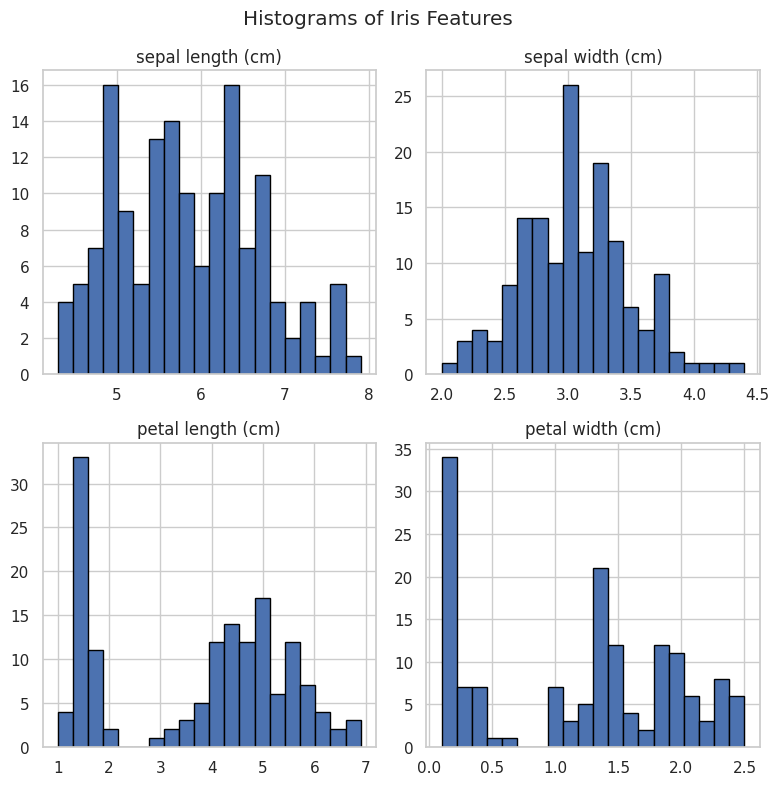

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(bins=20, figsize=(8,8), edgecolor='black')
plt.suptitle('Histograms of Iris Features')
plt.tight_layout() #plot the graph efficiently
plt.show()





Plot boxplots for each feature grouped by species

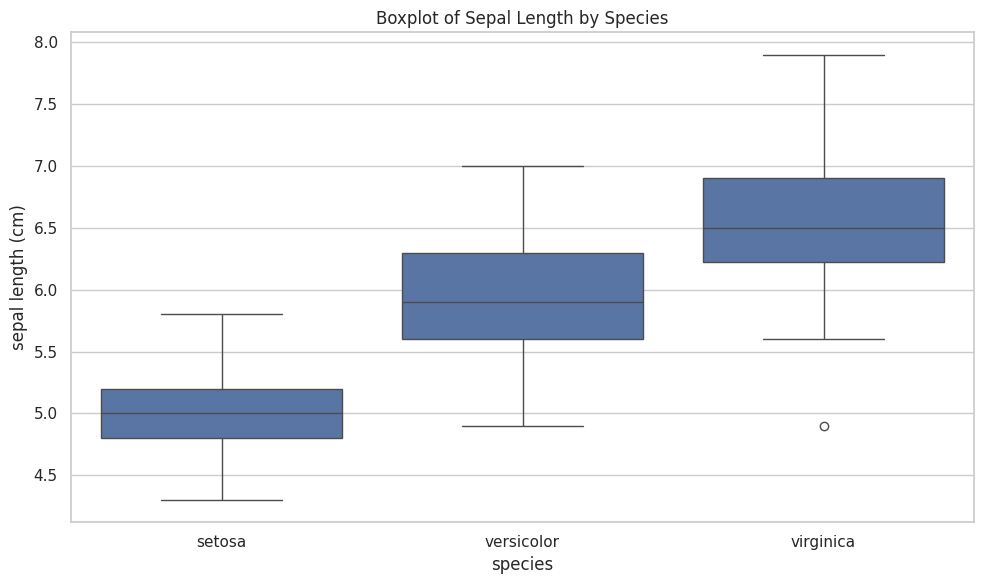

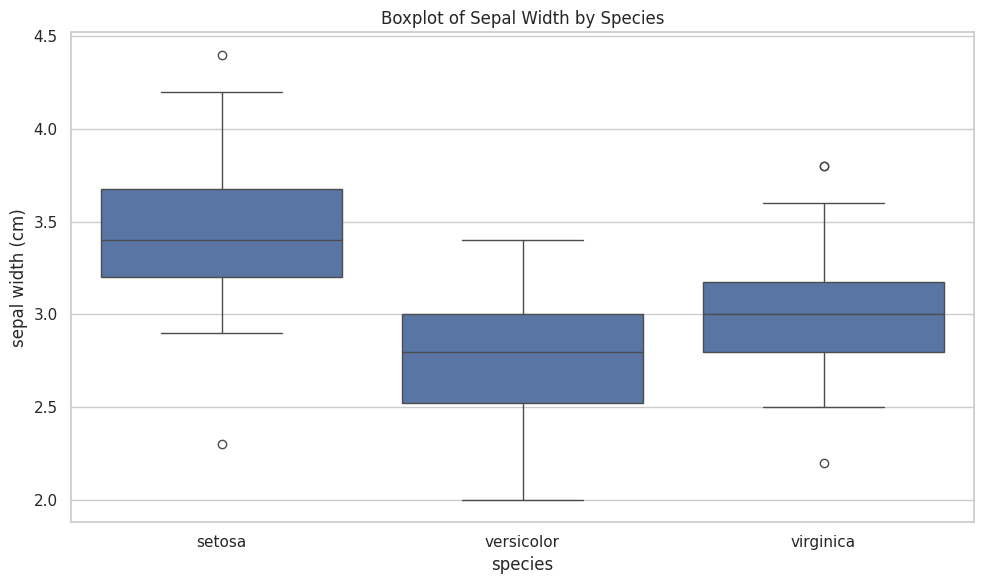

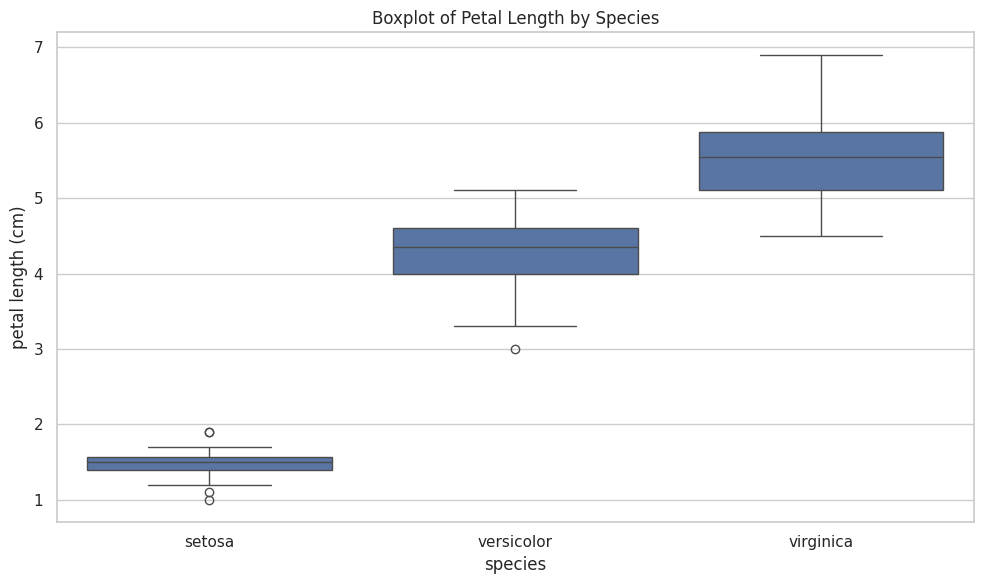

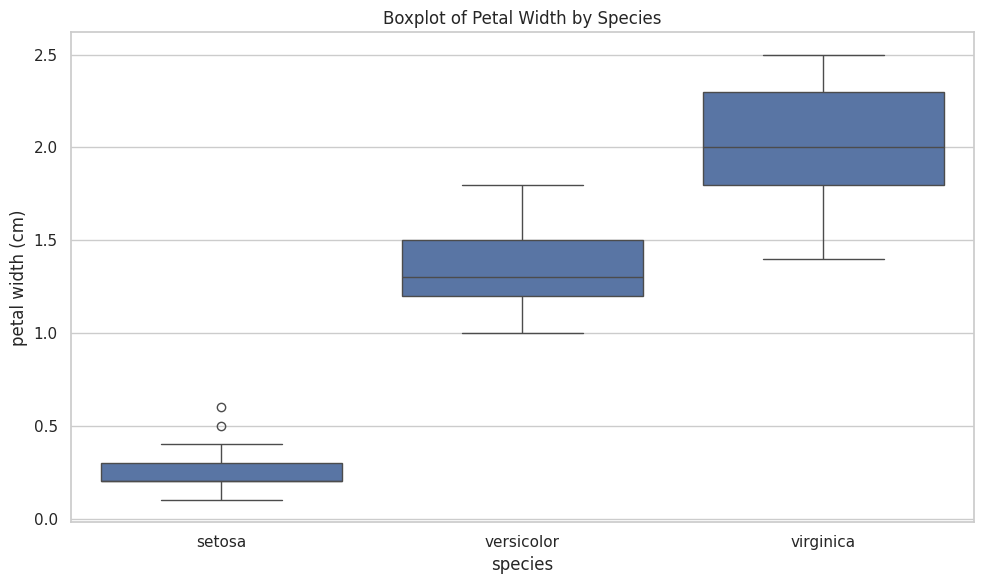

In [157]:
# Plot boxplots for each feature grouped by species
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title('Boxplot of Sepal Length by Species')
plt.tight_layout() #plot the graph efficiently
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='sepal width (cm)')
plt.title('Boxplot of Sepal Width by Species')
plt.tight_layout() #plot the graph efficiently
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title('Boxplot of Petal Length by Species')
plt.tight_layout() #plot the graph efficiently
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal width (cm)')
plt.title('Boxplot of Petal Width by Species')
plt.tight_layout() #plot the graph efficiently
plt.show()

Create a scatter plot using Plotly

In [158]:
import plotly.express as px
# Create a scatter plot using Plotly
fig = px.scatter(df, x="sepal width (cm)", y="sepal length (cm)", color="species",
                 title="Scatter Plot of Sepal Width vs Sepal Length",
                 labels={
                     "sepal width (cm)": "Sepal Width (cm)",
                     "sepal length (cm)": "Sepal Length (cm)",
                     "species": "Species"
                 })
fig.show()

correlation Analysis

In [159]:
# Compute the correlation matrix for numeric columns only
numeric_df = df.drop(columns=['species'])  # Exclude nonnumeric coloumn 'species' from the DataFrame to retain only the numeric columns.
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


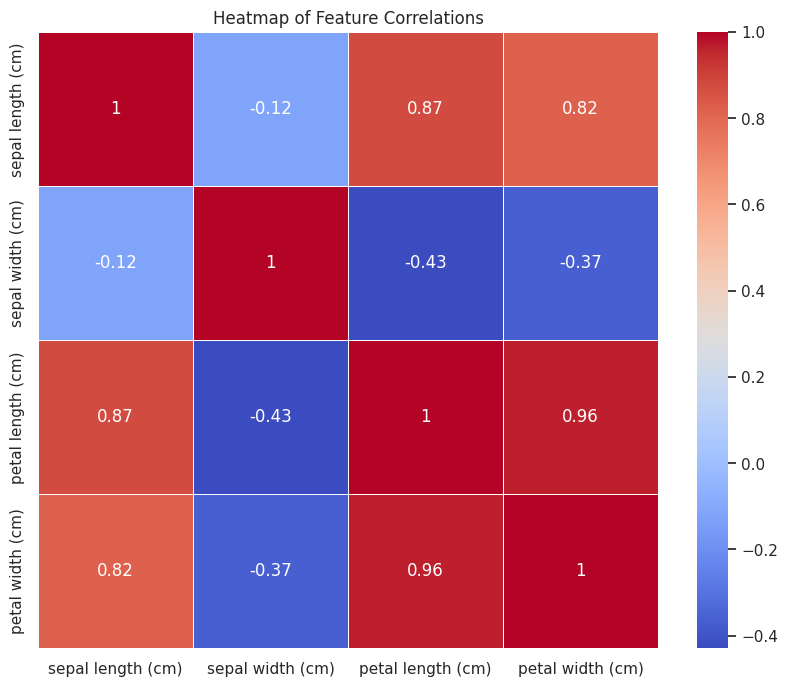

In [160]:
# Plot a heatmap of the correlation matrix using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

#Data Preprocessing

In [161]:
#encoding the target variable and scaling the features

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the target variable (species)
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Scale the features
scaler = StandardScaler()
X = df.drop(columns=['species'])
y = df['species']
X_scaled = scaler.fit_transform(X)

Train-Test- Split

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=40)


#Model Selection ,Training and Testing

#Model Selection (SVM)

In [163]:
#Support Vector Machine (SVM)  model for training
from sklearn.svm import SVC

# Train an SVM model
model = SVC(kernel='linear', random_state=40)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=40)

#Model Evaluation

In [164]:
#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


In [165]:
# A detailed classification report
from sklearn.metrics import classification_report

# Assuming you have predictions stored in 'pred'
pred = model.predict(X_test)

# Generate classification report
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#Testing the model

In [166]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create an SVC model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Example new data points
X_new = np.array([[3, 2, 1, 0.2], [4.9, 2.2, 3.8, 1.1], [5.3, 2.5, 4.6, 1.9]])

# Predict labels for new data points
predictions = model.predict(X_new)

print("Predictions for New Data:")
print("Prediction of Species: {}".format(predictions))
#print Actual species
y_true = iris.target_names[y_test]
print("Actual species:")
print(y_true)




Predictions for New Data:
Prediction of Species: [0 1 2]
Actual species:
['setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'versicolor']


# Hyperparameter Tuning using GridSearch

In [167]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid.best_params_}')
print(f'Best Score: {grid.best_score_}')

# Evaluate the best model on the test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f'Best Model Accuracy: {accuracy_best}')
print('Best Model Classification Report:')
print(report_best)
print('Best Model Confusion Matrix:')
print(conf_matrix_best)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

Model Deployment

In [168]:
import joblib

# Save the model
joblib.dump(best_model, 'iris_svm_model.pkl')

# Load the model (in a production environment)
loaded_model = joblib.load('iris_svm_model.pkl')